In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
assi_df_1=pd.read_excel('assigned_tech.xlsx')

In [16]:
assi_df_1.head()

,Unnamed: 0,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc,Zip_income
0,0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000,23933.540000
1,1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000,68711.216667
2,2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667,110329.465000
3,3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000,32925.410000
4,4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000,83225.340000


In [17]:
assi_df_1=assi_df_1.drop(['Unnamed: 0'],axis=1)

In [18]:
assi_df_1.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc', 'Zip_income'],
      dtype='object')

In [19]:
assi_df=assi_df_1[['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc']]

In [20]:
assi_df.head()

,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc
0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000
1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000
2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667
3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000
4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000


<AxesSubplot:>

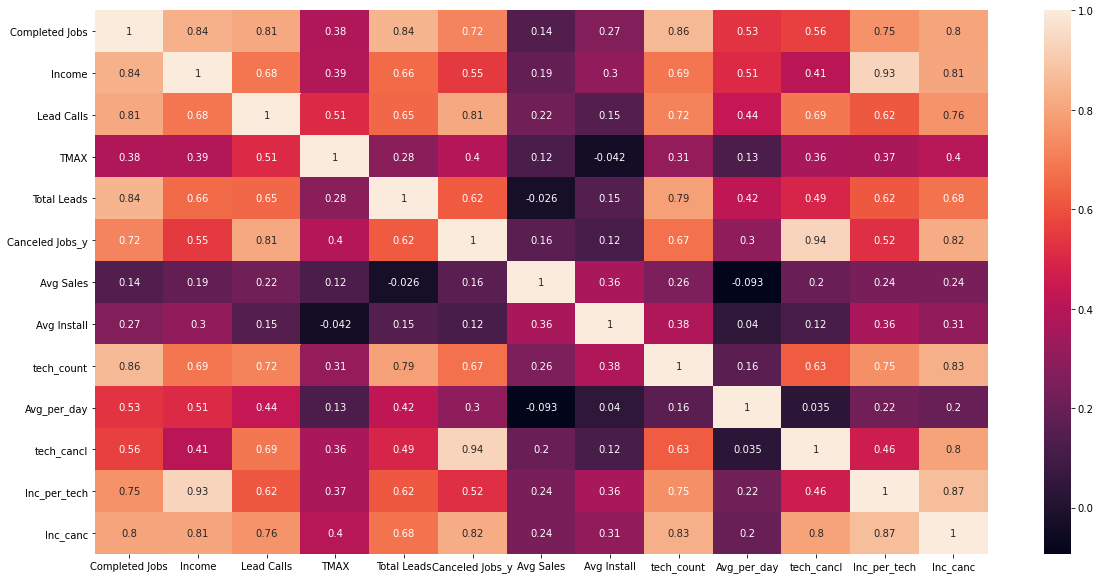

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(assi_df.corr(method='spearman'),annot=True)

In [22]:
assi_df.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc'],
      dtype='object')

In [23]:
train=assi_df[0:300]
test=assi_df[300:]

In [24]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
# applying KNN algoritham with K=1(worst case)
reg_model=KNeighborsRegressor(n_neighbors=1)
reg_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [31]:
# Model score on test data set 
# regression metric is r2_score
reg_model.score(X_train,y_train)

1.0

In [32]:
# Model performance score on test data set
reg_model.score(X_test,y_test)

0.7375373877983402

In [33]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [34]:
reg_model.score(X_,y_)

0.4347548955043625

# Hyperparameter tuning

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# for hyper parameter (k) tuning we take k value in the range 1 to 100

accuracy = []


for i in range(1,20):
    
    reg_model = KNeighborsRegressor(n_neighbors=i,weights='distance')
    score=cross_val_score(reg_model,X,y,cv=10,)
    accuracy.append(score.mean())

Text(0, 0.5, 'Accuracy')

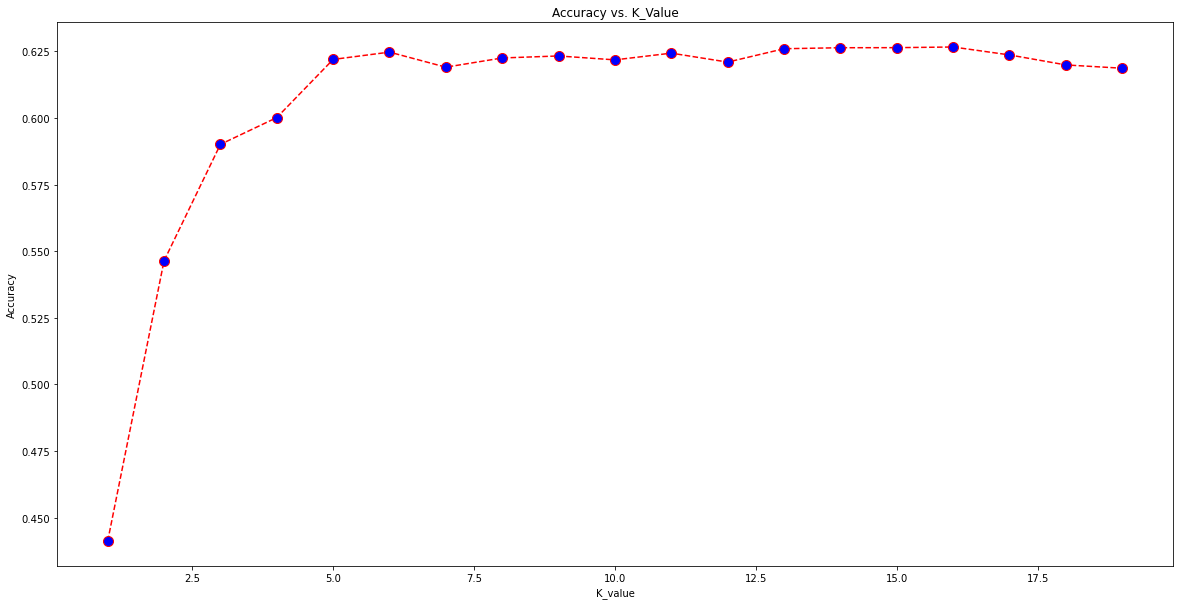

In [38]:
plt.figure(figsize=(20,10))
plt.plot(range(1,20),accuracy,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K_Value')
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [64]:
#Now we can apply KNN with k=17 to check performance

tuned_reg_model= KNeighborsRegressor(n_neighbors=14)

In [65]:
tuned_reg_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=14)

In [66]:
# performance of model on train dataset
tuned_reg_model.score(X_train,y_train)

0.77170728953768

In [67]:
# performance of model on test dataset
tuned_reg_model.score(X_test,y_test)

0.7832979553260192

In [68]:
tuned_reg_model.score(X_,y_)

0.4500528487289678

In [69]:
# prediction 

y_pred=tuned_reg_model.predict(X_)

In [70]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

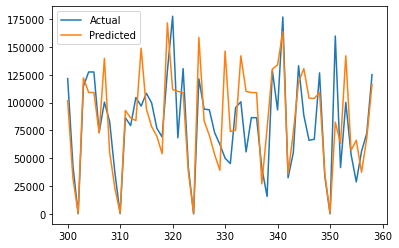

In [71]:
comp.plot()

In [73]:
from sklearn import metrics

In [74]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))

RMSE: 30948.78007340517
MAE: 23610.453087167065
